In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
# ucitavanje podataka
df = pd.read_csv('power-consumption.csv', sep=',')

In [94]:
# koverzija timestamp-a
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce', format='%m/%d/%Y %H:%M')

# druga konverzija
df.loc[df['DateTime'].isna(), 'DateTime'] = pd.to_datetime(df['DateTime'][df['DateTime'].isna()], errors='coerce', format='%d-%m-%Y %H:%M')

# drop nan 
df = df.dropna(subset=['DateTime'])

# df['Hour'] = df['DateTime'].dt.hour
# df['Minute'] = df['DateTime'].dt.minute

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
1728,2017-01-13 00:00:00,15.18,83.6,0.079,0.048,0.148,29401.51899,18284.49848,18413.49398
1729,2017-01-13 00:10:00,15.17,83.7,0.080,0.073,0.122,28556.96203,17748.32827,18118.55422
1730,2017-01-13 00:20:00,15.18,83.7,0.075,0.051,0.148,27639.49367,17412.76596,17661.68675
1731,2017-01-13 00:30:00,15.20,83.9,0.076,0.062,0.141,26740.25316,16920.36474,16921.44578
1732,2017-01-13 00:40:00,15.17,84.1,0.080,0.051,0.130,26661.26582,16562.91793,16701.68675


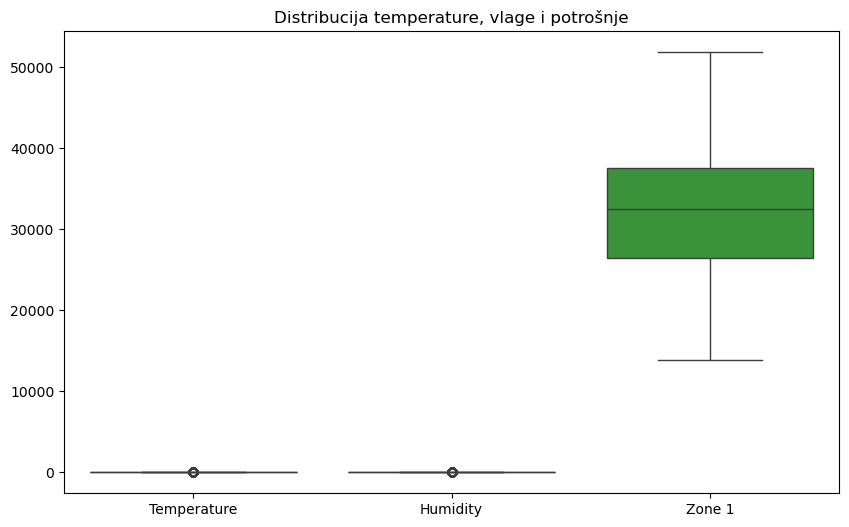

In [95]:
# prikaz osnovnih podataka

plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Temperature', 'Humidity', 'Zone 1']])
plt.title('Distribucija temperature, vlage i potrošnje')
plt.show()


In [96]:
#  lag varijable

df['lag_10min'] = df['Zone 1'].shift(1)
# df['lag_30min'] = df['Zone 1'].shift(3)
df['lag_1h'] = df['Zone 1'].shift(6)
# df['sum_1h'] = df['Zone 1'].rolling(window=6).sum()

df = df.dropna()

df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3,lag_10min,lag_1h
1734,2017-01-13 01:00:00,15.09,84.6,0.081,0.055,0.130,25731.64557,15771.42857,16013.49398,26065.82278,29401.51899
1735,2017-01-13 01:10:00,15.02,84.8,0.080,0.048,0.185,25160.50633,15614.58967,15643.37349,25731.64557,28556.96203
1736,2017-01-13 01:20:00,14.94,85.2,0.083,0.037,0.185,24631.89873,15078.41945,15475.66265,25160.50633,27639.49367
1737,2017-01-13 01:30:00,14.90,85.4,0.074,0.055,0.141,24431.39241,14593.31307,15290.60241,24631.89873,26740.25316
1738,2017-01-13 01:40:00,14.90,85.4,0.074,0.066,0.145,24012.15190,14534.95441,15325.30120,24431.39241,26661.26582


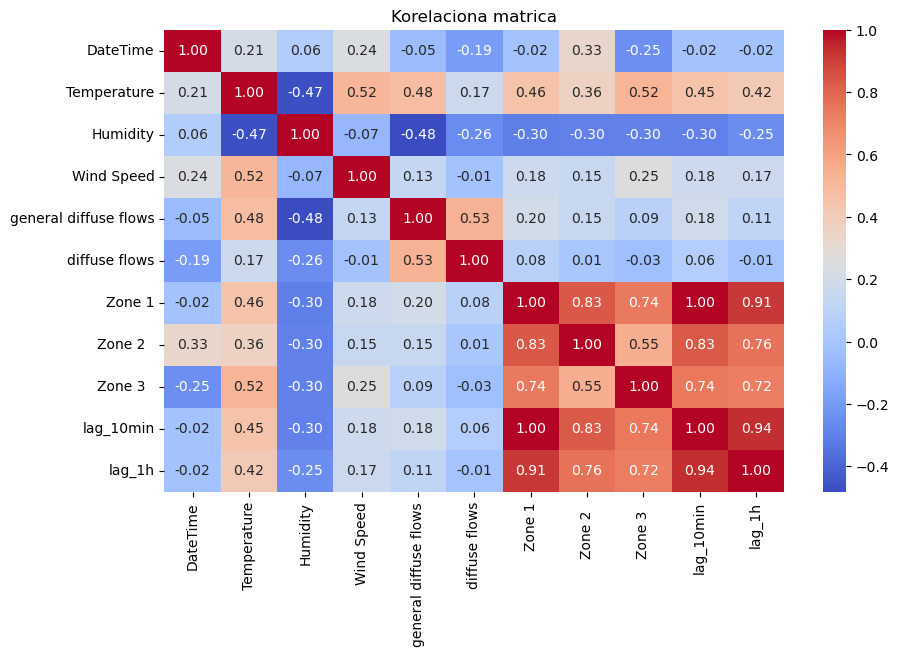

In [107]:
# korelaciona matrica
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelaciona matrica')
plt.show()

In [99]:
# priprema podataka za treniranje

X = df[['Temperature', 'Humidity', 'Wind Speed', 'lag_10min']]
y = df['Zone 1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False, random_state=42)


In [100]:

# skaliranje

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear regresija R²: 0.9924
Linear Regression MAE: 382.7661
Linear Regression MSE: 327151.8376


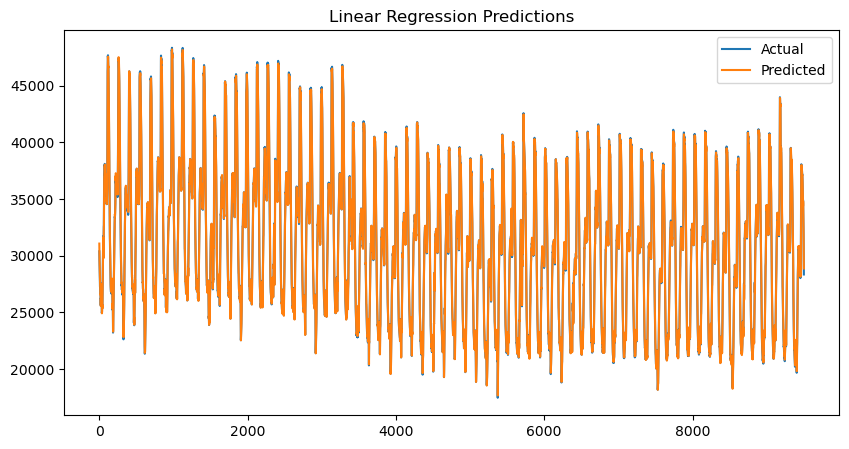

In [101]:
# linearna regresija
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

print(f'Linear regresija R²: {r2_score(y_test, y_pred_lr):.4f}')
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}')
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr):.4f}')

# vizualizacija predikcija
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()



In [102]:
# usporedba 

comparison_df = pd.DataFrame({'stvarni': y_test.values, 'predvidjeni': y_pred_lr})
print(comparison_df.head(20))


        stvarni   predvidjeni
0   30392.92035  31073.235971
1   30010.61947  30338.279379
2   29596.46018  29955.163541
3   29296.99115  29543.894749
4   28545.13274  29244.466476
5   28385.84071  28498.600357
6   28341.23894  28337.101391
7   28130.97345  28293.845282
8   27532.03540  28085.630665
9   27258.05310  27492.305722
10  27258.05310  27220.324575
11  26920.35398  27219.195808
12  26646.37168  26883.810456
13  26620.88496  26611.332779
14  26640.00000  26583.453637
15  26563.53982  26602.104653
16  26487.07965  26525.799611
17  26034.69027  26449.424102
18  25607.78761  26000.062288
19  25620.53097  25577.736373


R²: 0.9825
MAE: 629.5308
MSE: 747467.5096


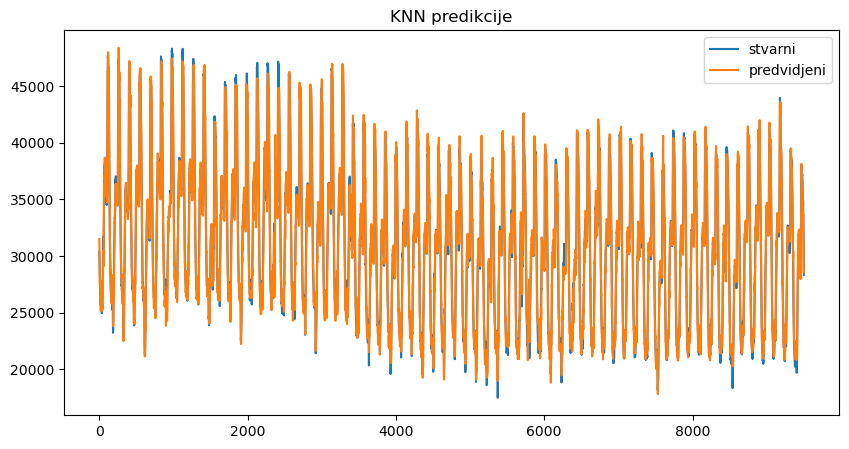

In [103]:
#  knn regresija

model_knn = KNeighborsRegressor(n_neighbors=4)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

print(f'R²: {r2_score(y_test, y_pred_knn):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_knn):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_knn):.4f}')

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='stvarni')
plt.plot(y_pred_knn, label='predvidjeni')
plt.title('KNN predikcije')
plt.legend()
plt.show()

R²: 0.9901
MAE: 457.7508
MSE: 422749.6037


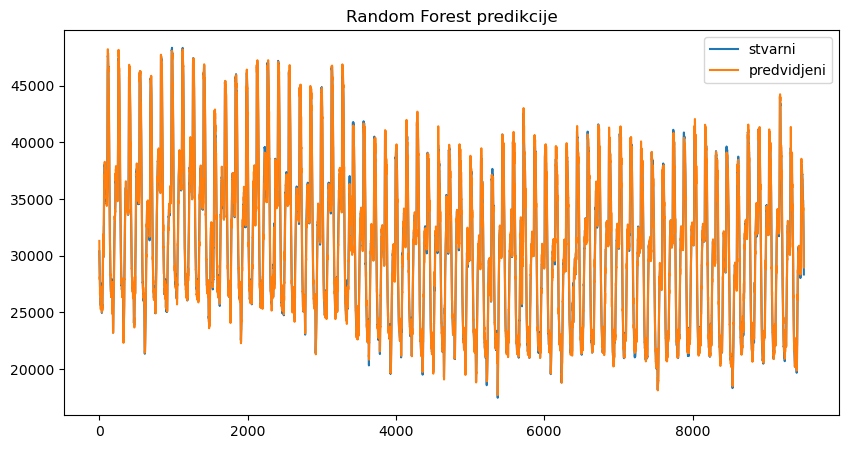

In [104]:

#  random forest regression
model_rf = RandomForestRegressor(n_estimators=10)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(f'R²: {r2_score(y_test, y_pred_rf):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf):.4f}')

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='stvarni')
plt.plot(y_pred_rf, label='predvidjeni')
plt.title('Random Forest predikcije')
plt.legend()
plt.show()



R²: 0.9911
MAE: 424.5509
MSE: 381320.3302


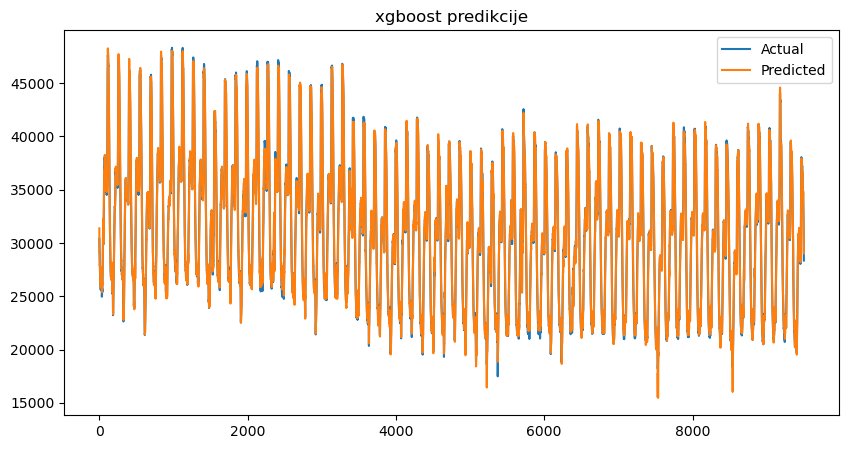

In [105]:
import xgboost as xgb


dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
num_rounds = 100
model_xgb = xgb.train(params, dtrain, num_rounds)
y_pred_xgb = model_xgb.predict(dtest)
print(f'R²: {r2_score(y_test, y_pred_xgb):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}')
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_xgb, label='Predicted')
plt.title('xgboost predikcije')
plt.legend()
plt.show()

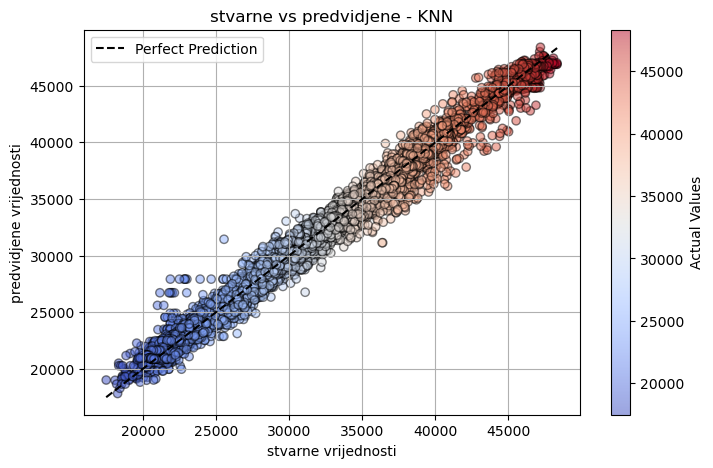

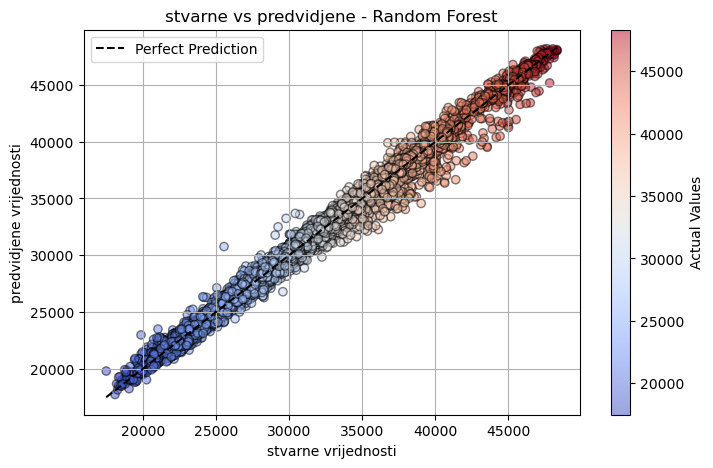

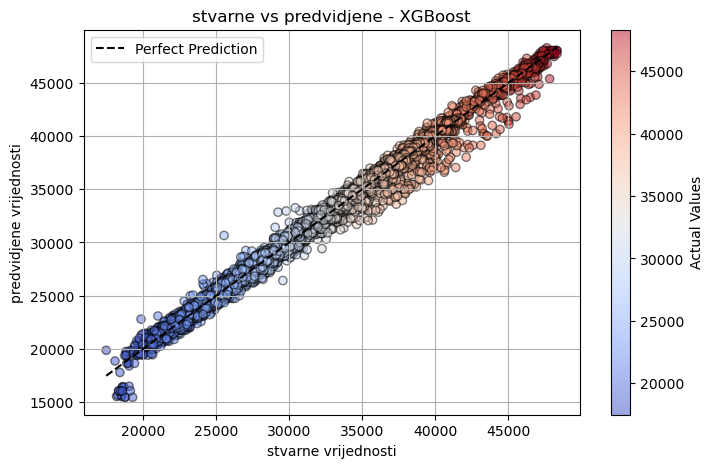

In [106]:

# scatter plot stvarnih i predviđenih vrednosti

def plot_scatter(y_true, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, alpha=0.5, c=y_true, cmap='coolwarm', edgecolors='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle="--", color='black', label='Perfect Prediction')
    plt.xlabel('stvarne vrijednosti')
    plt.ylabel('predvidjene vrijednosti')
    plt.title(f'stvarne vs predvidjene - {title}')
    plt.colorbar(label='Actual Values')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_scatter(y_test, y_pred_knn, 'KNN')
plot_scatter(y_test, y_pred_rf, 'Random Forest')
plot_scatter(y_test, y_pred_xgb, 'XGBoost')




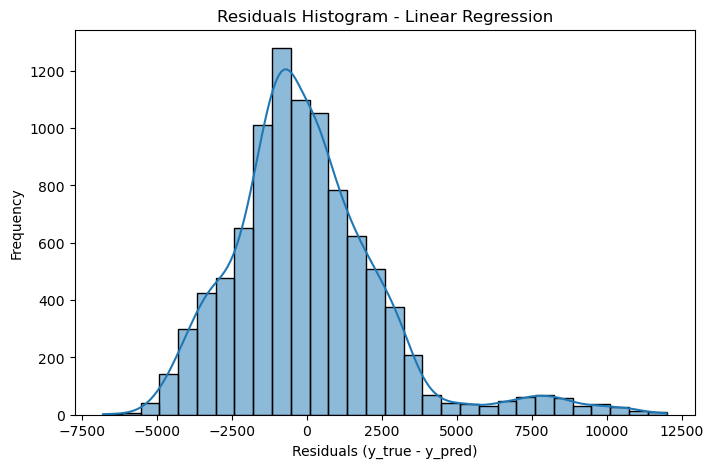

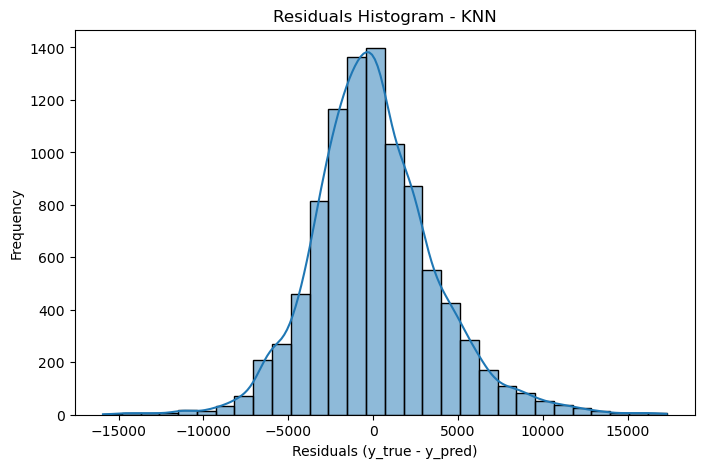

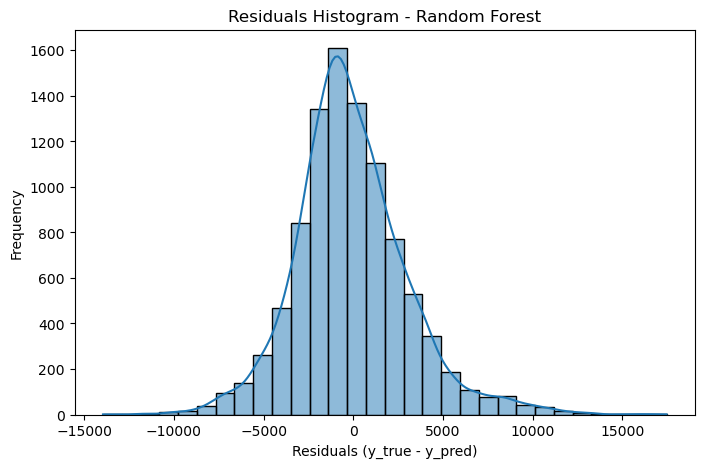

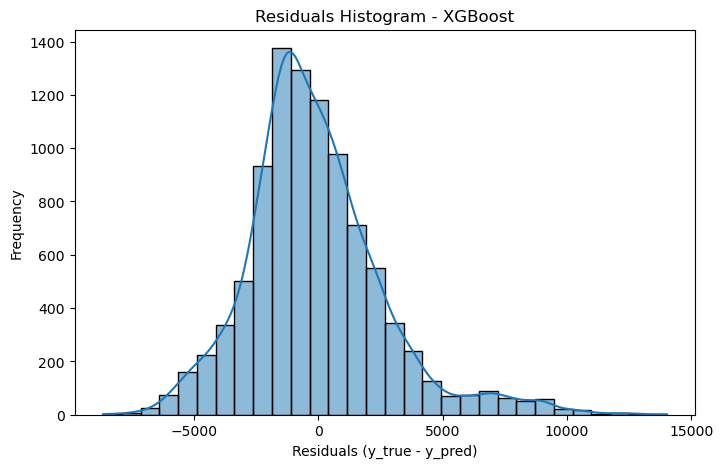

In [54]:
# histogram gresaka
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f'residuals histogram - {title}')
    plt.xlabel('Residuals (y_true - y_pred)')
    plt.ylabel('Frequency')
    plt.show()

plot_residuals(y_test, y_pred_lr, 'linearna regrsija')
plot_residuals(y_test, y_pred_knn, 'knn')
plot_residuals(y_test, y_pred_rf, 'radnom forest')
plot_residuals(y_test, y_pred_xgb, 'xgboost')